In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
df=pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [3]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [4]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [5]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<AxesSubplot:>

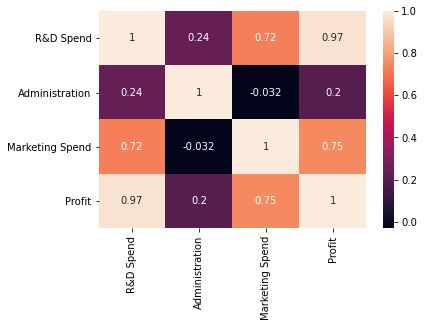

In [6]:
sns.heatmap(df.corr(),annot=True)

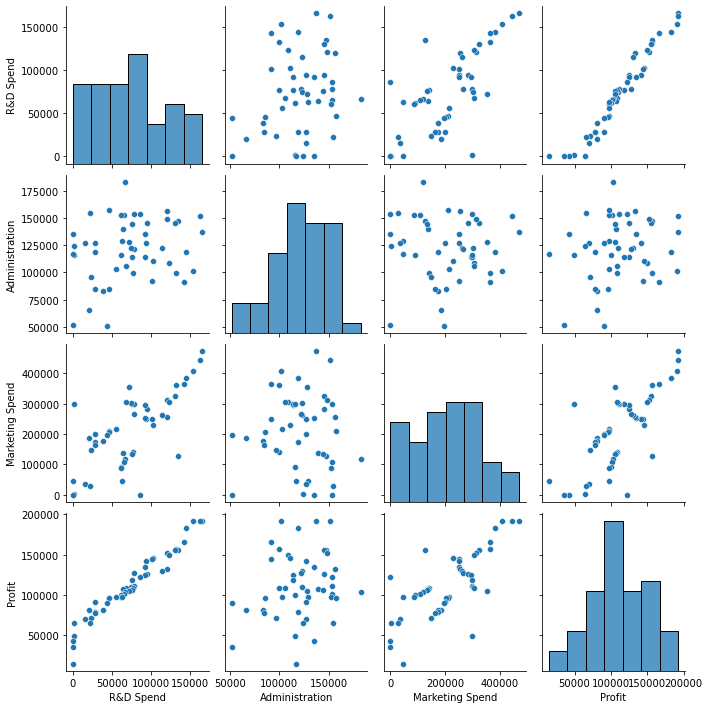

In [7]:
sns.pairplot(df);

In [8]:
dummy=pd.get_dummies(df['State'],drop_first=True)

In [9]:
dummy

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0
5,0,1
6,0,0
7,1,0
8,0,1
9,0,0


In [10]:
df=pd.concat([df,dummy],axis=1)

In [11]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,1
1,162597.70,151377.59,443898.53,California,191792.06,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,1,0


In [12]:
df.drop(['State'],axis=1,inplace=True)

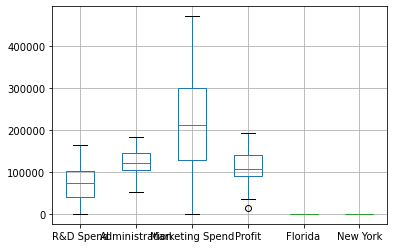

In [13]:
df.boxplot();

In [14]:
X=df.drop('Profit',axis=1)
y=df['Profit']

In [15]:
from sklearn.preprocessing import StandardScaler
# define StandScaler scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(X)

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(scaled,y,test_size=0.2,random_state=42)
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
Reg_predict=reg.predict(X_test)

In [17]:
reg.score(X_test, y_test)

0.8987266414319837

# Simple Regression

In [18]:
X=df['R&D Spend'].values.reshape(-1,1)
y=df['Profit'].values

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)
reg1 = LinearRegression()

In [20]:
reg1.fit(X_train,y_train)

LinearRegression()

In [21]:
y_train_pred= reg1.predict(X_train)
y_test_pred=reg1.predict(X_test)

In [22]:
reg1.score(X_train,y_train)

0.9467864227524652

In [24]:
reg1.score(X_test,y_test)

0.9265108109341951

C:\Users\Rushikesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


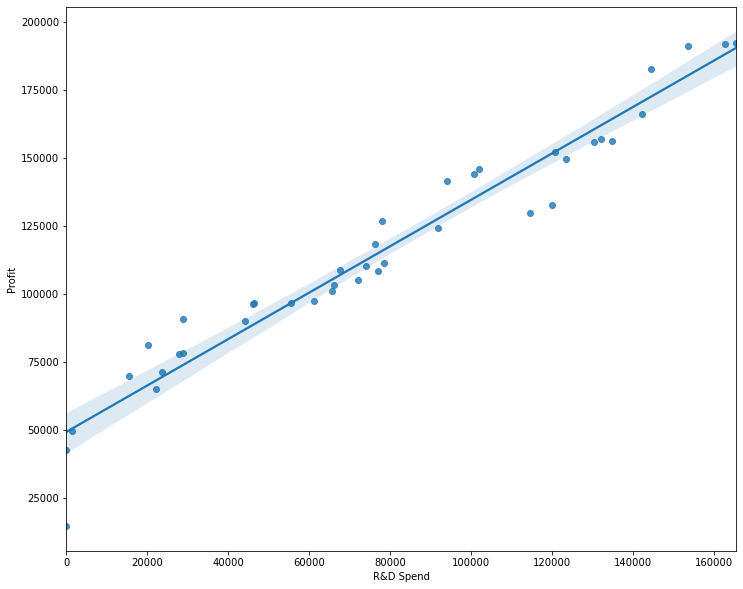

In [25]:
#To draw best fit line on train data
plt.figure(figsize=(12,10));
sns.regplot(X_train,y_train);
plt.xlabel('R&D Spend')
plt.ylabel("Profit");

In [26]:
import numpy as np
reg1.predict(np.array([165349.20]).reshape(1,-1))

array([190480.25107829])

In [27]:
# R2 And MSE
from sklearn import metrics
from sklearn.metrics import mean_squared_error
print('RME=',metrics.mean_absolute_error(y_train,y_train_pred))
print("R score=",metrics.r2_score(y_train,y_train_pred))
print("MSE = ", metrics.mean_squared_error(y_train,y_train_pred))
print('RMSE=',np.sqrt(mean_squared_error(y_train,y_train_pred)))

RME= 7132.762322180808
R score= 0.9467864227524652
MSE =  91604934.5611557
RMSE= 9571.046680544177


In [28]:
print('RME=',metrics.mean_absolute_error(y_test,y_test_pred))
print("R score=",metrics.r2_score(y_test,y_test_pred))
print("MSE = ", metrics.mean_squared_error(y_test,y_test_pred))
print('RMSE=',np.sqrt(mean_squared_error(y_test,y_test_pred)))

RME= 6077.363300620399
R score= 0.9265108109341951
MSE =  59510962.80787996
RMSE= 7714.334890830185


In [30]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
folds=KFold(n_splits = 10, shuffle=True, random_state=42)
scores=cross_val_score(reg1,X_train,y_train, scoring='r2', cv=folds)
scores
accuracy_fold=np.mean(abs(scores))
accuracy_fold

0.9250972243931542

In [31]:
from sklearn import linear_model
ridge_reg= linear_model.Ridge(alpha=500, max_iter=100, tol=0.01)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=500, max_iter=100, tol=0.01)

In [32]:
ridge_reg.score(X_test, y_test)

0.9265108107919873

In [33]:
# Lasso(L1)
from sklearn import linear_model 
lasso_reg = linear_model.Lasso(alpha=500, max_iter=100, tol=0.01)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=500, max_iter=100, tol=0.01)

In [34]:
lasso_reg.score(X_test, y_test)

0.9265108042702712

In [35]:
# Elastic Net
from sklearn.linear_model import ElasticNet
en_mod = ElasticNet(alpha=0.02)
en_mod.fit(X_train, y_train)
en_model_pred = en_mod.predict(X_test)

In [36]:
en_mod.score(X_test, y_test)

0.9265108109339479

# Multipal Regression

In [37]:
X=df.drop(['Profit'],axis=1).values


In [38]:
y=df['Profit'].values


In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
reg=LinearRegression()

In [43]:
reg.fit(X_train,y_train)

LinearRegression()

In [44]:
reg.coef_

array([ 7.73467193e-01,  3.28845975e-02,  3.66100259e-02, -9.59284160e+02,
        6.99369053e+02])

In [45]:
reg.intercept_

42554.16761773241

In [46]:
y_test_pred=reg.predict(X_test)

In [47]:
y_train_pred=reg.predict(X_train)

In [48]:
y_test_pred

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

# Performance Metric

In [49]:
from sklearn.metrics import mean_squared_error

In [50]:
mean_squared_error(y_train,y_train_pred)

81571001.80077371

In [51]:
mean_squared_error(y_test,y_test_pred)

83502864.03257735

#  Coefficient of Determination R2

In [52]:
from sklearn.metrics import r2_score

In [53]:
r2_score(y_train,y_train_pred)

0.9501847627493607

In [54]:
r2_score(y_test,y_test_pred)

0.9347068473282425

In [55]:
reg.score(X_train,y_train)

0.9501847627493607

In [56]:
reg.score(X_test,y_test)

0.9347068473282425

In [57]:
#cross Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
folds=KFold(n_splits = 10, shuffle=True, random_state=42)
scores=cross_val_score(reg,X_train,y_train, scoring='r2', cv=folds)
scores
accuracy_fold=np.mean(abs(scores))
accuracy_fold

0.9020908485949253

# K Fold

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
lm=LinearRegression()
score=cross_val_score(lm,X_train,y_train,cv=10)
score

In [ ]:
accuracy_fold=np.mean(abs(score))

In [ ]:
accuracy_fold

In [ ]:
score=cross_val_score(lm,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
score

In [ ]:
accuray_fold=np.mean(abs(score))

In [ ]:
accuray_fold

In [ ]:
folds=KFold(n_splits=5,shuffle=True,random_state=42)
scores=cross_val_score(lm,X_train,y_train,scoring='r2',cv=folds)
scores

In [ ]:
acc_fold=np.mean(abs(scores))
acc_fold

In [58]:
#grid cv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=10)
print('scores',scores)
accuracy_regfold=np.mean(abs(scores))
print('\nCV mean',accuracy_regfold)

scores [-1.15957515  0.74915646  0.87374407  0.90759749  0.94615439  0.87311831
  0.94937041  0.82148888  0.93492203  0.98728514]

CV mean 0.9202412310502718


In [59]:
from sklearn.feature_selection import RFE
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 8, shuffle = True, random_state = 45)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 8))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)

In [60]:
from sklearn.model_selection import GridSearchCV
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train) 

Fitting 8 folds for each of 7 candidates, totalling 56 fits


GridSearchCV(cv=KFold(n_splits=8, random_state=45, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7]}],
             return_train_score=True, scoring='r2', verbose=1)

In [61]:
model_cv.best_estimator_

RFE(estimator=LinearRegression(), n_features_to_select=3)

In [62]:
# final model
n_features_optimal = 3

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = lm.predict(X_test)
import sklearn.metrics
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.9347068473282425


# Stratified Fold